<a href="https://colab.research.google.com/github/AsaevichNik/JavaLabs/blob/MachineLearning/0020102.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size = 6>
Отбор данных одномерной выборки


Выполнил: Асаевич Н.С ММБ-002

Цель работы - очистка данных одномерной выборки, т.е поиск и удаление аномальных значений

# Введение



Подключаем библиотеки pandas, matplotlib.pyplot, numpy, stats:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

Ограничим вывод на печать размер таблиц: количество столбцов не более 9, количество строк - не более 5

In [11]:
pd.set_option('max_columns', 9)
pd.set_option('max_rows', 5)

OptionError: ignored

Импортируем данные

In [7]:
ds0 = pd.read_csv("ML.ds1.csv")
ds0

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v66,v67,v68,v69,v70,v71,v72,v73,v74,v75
0,1.674664,-0.105114,1.123071,0.159780,-2.653400,0.731480,0.248630,-2.411234,0.975680,9.011194,...,0.635269,0.766523,1.108400,1.075446,6.565005,0.839696,0.496592,0.728681,-1.186913,0.871300
1,1.815983,0.793212,0.437694,1.374387,-0.055956,0.678019,0.245999,2.632142,1.094653,1.099596,...,0.967244,0.973246,4.109887,1.034150,9.851633,7.415128,0.583847,1.338758,2.582966,1.162462
2,0.777174,-1.030174,0.439461,1.371726,1.605366,0.695225,0.969702,2.473882,0.910368,4.997584,...,0.517114,5.820453,-2.094585,1.047369,9.560367,-1.748572,0.778761,1.445412,-4.385701,0.858215
3,1.030925,1.576539,0.906160,1.028792,-0.723862,0.626546,0.321099,-4.724615,1.039090,6.129512,...,0.627821,0.499243,-7.330234,0.768444,2.383294,1.495813,0.833851,1.649441,-0.528993,0.695496
4,0.872935,-0.723648,1.163915,3.085364,0.129386,0.896113,1.215447,0.969162,0.972609,7.535088,...,0.589966,1.972031,0.225700,0.943955,8.833605,11.804698,0.518266,1.615040,0.328252,1.025233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.051487,-0.620462,0.984011,0.066505,-1.936210,0.477732,0.179516,0.570672,0.773189,4.008374,...,0.715936,0.263542,2.127951,0.914104,8.870941,1.133994,0.619651,0.748321,-0.015590,0.856599
496,0.867025,1.760782,0.530252,2.462219,-0.206389,0.852106,0.921861,-3.999858,1.001532,5.545035,...,0.607631,1.261785,5.337368,1.027842,10.175664,2.997243,0.693555,1.461349,-1.445974,0.561864
497,1.110853,0.047405,1.081321,0.480877,2.006554,0.895313,2.915025,6.306436,0.953056,4.765150,...,0.266152,0.220973,2.092166,1.030427,11.488892,0.377065,0.570648,0.719444,-0.069232,0.778094
498,1.403898,0.265252,0.834466,0.207733,2.240169,0.860908,0.413167,5.852722,0.787571,4.639298,...,0.744873,0.699414,-5.926462,0.986691,3.612117,0.323205,0.337280,0.951353,1.536677,0.625214


Выделяем в отдельную таблицу столбец v2 и переименовываем его в s2

In [12]:
ds = ds0[['v2']].rename({'v2':'s2'}, axis = 1)
ds

,s2
0,-0.105114
1,0.793212
2,-1.030174
3,1.576539
4,-0.723648
...,...
495,-0.620462
496,1.760782
497,0.047405
498,0.265252


## Описательная статистика


Вычислим числовые характеристики выборки, которые будем использовать в дальнейшем и составим из них таблицу

In [13]:
mu = ds.s2.mean()
sd = ds.s2.std()
med = ds.s2.median()
sk = ds.s2.skew()

In [14]:
ind = ['mean', 'std', 'median', 'skew']
dat = [mu, sd, med, sk]
pd.DataFrame(dat, ind, columns=['Sample']).T

,mean,std,median,skew
Sample,-0.161789,1.702182,-0.182959,0.1505


# Визуализация данных

Построим диаграмму рассеяния, но расположив выборочные значения по горизонтальной оси

Text(0.5, 0, 'Выборочные значения')

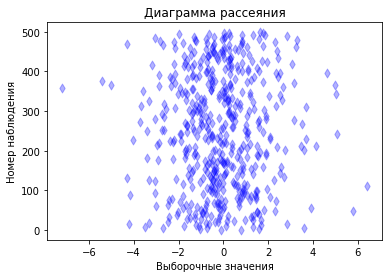

In [15]:
plt.scatter(ds.s2, ds.index, c = 'b', marker = 'd', s = 40, alpha = 0.3)
plt.title("Диаграмма рассеяния")
plt.ylabel("Номер наблюдения")
plt.xlabel("Выборочные значения")


В выборке, по-видимому присутствуют аномальные данные

В генеральной совокупности несимметричность не замечена

Построим диаграмму размаха

Text(0.5, 0, 'Выборочные значения')

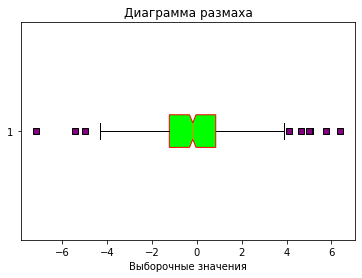

In [16]:
box = plt.boxplot(ds.s2, vert = False, notch = True, patch_artist = True, 
                  flierprops = dict(markerfacecolor = 'purple', marker = 's'),
                  boxprops = dict(color = 'red', facecolor = 'lime'))
plt.title("Диаграмма размаха")
plt.xlabel("Выборочные значения")

## Вывод

Анализ данных показал:

*   В выборке по-видимому, присутствуют аномальные данные;
*   Генеральная совокупность, скорее всего, симметрична: график плотности распределения исследуемого показателя генеральной совокупности симметричен



# Отбор данных

## Проверка на симметричность

Проверим генеральную совокупность на симметричность с помощью двух тестов, в которых основная гипотеза - генеральная совокупность симметричная

Первый тест сравнивает выборочное среднее с выборочной медианой

Вычислим объем выборки, наблюдаемое и критическое значения

In [17]:
ns = ds.size
print("Объем выборки равен", ns)

Объем выборки равен 500


In [18]:
xn1 = abs(mu-med)
print("Наблюдаемое значение равно", xn1)

Наблюдаемое значение равно 0.021170293077626995


In [19]:
xk1 = 3*sd/np.sqrt(ns)
print("Критическое значение равно", xk1)

Критическое значение равно 0.22837170910783336


Так как наблюдаемое значение меньше критического, то гипотеза о симметричности генеральной совокупности не отвергается

Второй тест оценивает величину выборочного коэффициента асимметрии

Вычислим наблюдаемое и критическое значения

In [20]:
xn2 = abs(sk)
print("Наблюдаемое значение равно", xn2)

Наблюдаемое значение равно 0.15049960268996024


In [26]:
xk2 = np.sqrt(54*(ns-1)/(ns+1)/(ns+3))
print("Критическое значение равно", xk2)

Критическое значение равно 0.32699739828405644


Так как наблюдаемое значение меньше критического, то гипотеза о симметричности генеральной совокупности не отвергается

### Вывод 

Исходя из анализа диаграмм и результатов двух тестов можно сделать вывод о том, что гипотеза о симметричности генеральной совокупности (по исследуемому показателю) не противоречит выборочным данным

## Очистка данных

Гипотеза о симметричности генеральной совокупности по исследуемому показателю не была отвергнута, поэтому для отбора данных будем использовать интервал вида ($\overline{x}$ - 3s; $\overline{x}$ + 3s), где $\overline{x}$ - выборочное среднее, s - стандартное отклонение

Вычислим границы этого интервала

In [28]:
A = mu - 3*sd
B = mu + 3*sd
print("Левая раница интервала:", A)
print("Правая граница интервала:", B)

Левая раница интервала: -5.268335749250077
Правая граница интервала: 4.944757564808389


Выделим аномальные данные

In [29]:
ds[ds.s2 <= A]

,s2
359,-7.184671
375,-5.421436


In [31]:
ds[ds.s2 >= B]

,s2
48,5.772020
110,6.390799
242,5.049369
343,5.038286
365,4.981372


Таким образом было найдено семь аномальных значений

Выполним очистку данных: выберем те значения, которые попадают в указанный 

In [32]:
ds_filter = ds[(ds.s2 >= A)&(ds.s2 <= B)]
ds_filter

,s2
0,-0.105114
1,0.793212
2,-1.030174
3,1.576539
4,-0.723648
...,...
495,-0.620462
496,1.760782
497,0.047405
498,0.265252


Подсчитаем количество отобранных данных

In [33]:
print("Количество отобранных данных равно", ds_filter.shape[0])

Количество отобранных данных равно 493


# Заключение

В работе был проведен отбор данных одномерной выборки, взятой из генеральной совокупности. Сначала с помощью диаграмм и тестов было установлено, что гипотеза о симметричности исследуемого показателя генеральной совокупности не противоречит выборочным данным. Исходя из этого для отбора данных использовался интервал ($\overline{x}$ - 3s; $\overline{x}$ + 3s), где $\overline{x}$ - выборочное среднее, s - стандартное отклонение. Обнаружены 7 аномальных значений: элементы выборки с номерами 48, 110, 242, 343, 359, 365, 375, не попавшие в указанный интервал. Эти значения были удалены из выборки